In [122]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
import spark_greedy
import main
import networkx as nx

In [6]:
def load_nc_mini_results(N):
    with open("sparkruns/{}info.json".format(N),"r") as fd:
        trials = json.load(fd)
    return trials

In [7]:
mini_100 = load_nc_mini_results(100)
mini_300 = load_nc_mini_results(300)
mini_500 = load_nc_mini_results(500)
mini_1000 = load_nc_mini_results(1000)

In [15]:
mini_100_nodes = set([node for result in mini_100['nodes'] for node in result])
mini_300_nodes = set([node for result in mini_300['nodes'] for node in result])
mini_500_nodes = set([node for result in mini_500['nodes'] for node in result])
mini_1000_nodes = set([node for result in mini_1000['nodes'] for node in result])

In [16]:
mini_300_nodes.issubset(mini_100_nodes)

True

In [17]:
mini_500_nodes.issubset(mini_100_nodes)

True

In [18]:
mini_1000_nodes.issubset(mini_100_nodes)

True

In [72]:
def load_nc_full_results(t):
    if t == 1:
        with open("sparkruns/20trials_3k_50N_1t_info.json","r") as fd:
            return json.load(fd)
    else:
        trials = {}
        trials['nodes'] = []
        trials['results'] = []
        for i in range(6, 21):
            with open("sparkruns/20trials_3k_50N_{}t_info_{}.json".format(t, i),"r") as fd:
                result = json.load(fd)
                trials['nodes'].append(result['nodes'][0])
                trials['results'].append(result['results'][0])
        return trials

In [116]:
def output_full(t, y_min = None, y_max = None):
    full = load_nc_full_results(t)
    full_results = map(lambda x: x['mean'], full['results'])[:15]
    fig, axs = plt.subplots(2,1)
    print "min:" + str(min(full_results))
    print "max:" + str(max(full_results))
    print "lambda:" + str(min(full_results)/max(full_results))
    axs[0].scatter(range(0, 15), full_results)
    axs[0].set_title(r't={}, $\lambda = $'.format(t) + str(min(full_results)/max(full_results)), fontsize=20)
    x1,x2,y1,y2 = axs[0].axis()
    if y_min is not None:
        axs[0].axis((x1,x2,y_min,y_max))
    nodes_values = spark_greedy.node_count(full)
    patches, texts = axs[1].pie(nodes_values.values(), labels=map(lambda x: "" if nodes_values[x] < 3 else x ,nodes_values.keys()))
    texts[0].set_fontsize(1)
    fig.set_figheight(fig.get_figheight()*2)
    return set([node for res in full['nodes'] for node in res])

min:1465.32
max:1504.28
lambda:0.974100566384


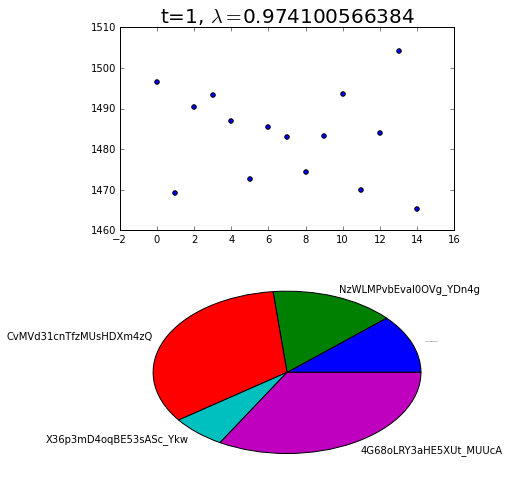

In [117]:
t1_nodes = output_full(1)

min:8453.82
max:8480.96
lambda:0.996799890578


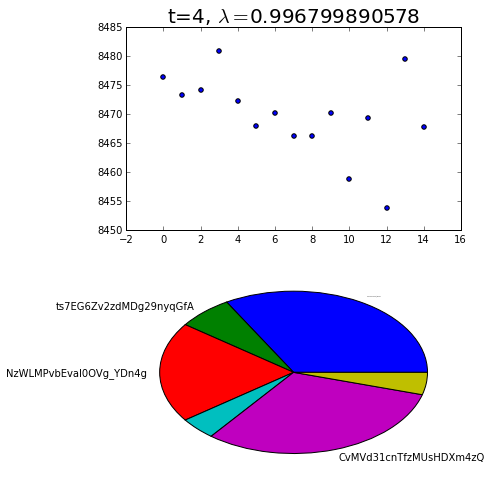

In [118]:
t4_nodes = output_full(4)

min:8966.66
max:8980.06
lambda:0.99850780507


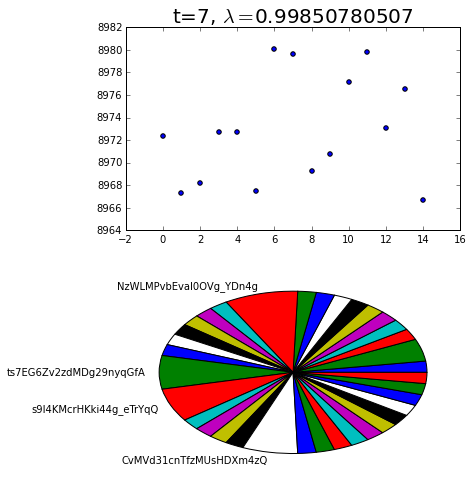

In [119]:
t7_nodes = output_full(7)

min:8985.16
max:8998.66
lambda:0.998499776633


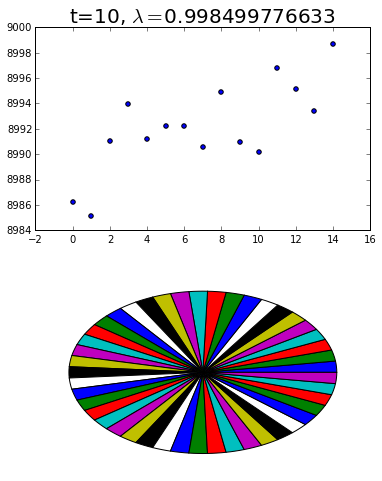

In [120]:
t10_nodes = output_full(10)

In [160]:
NC_full = main.import_graph("nc_full.json")

In [163]:
NC_full_undirected = nx.DiGraph.to_undirected(NC_full)

In [205]:
def connected_components(nodes):
    nodes = list(nodes)
    component_roots = [nodes[0]]
    components = [[nodes[0]]]
    for i in range(1, len(nodes)):
        connected = False
        for j in range(len(component_roots)):
            connected = connected or nx.has_path(NC_full, component_roots[j], nodes[i])
            if connected:
                components[j].append(nodes[i])
                break
        if not connected:
            component_roots.append(nodes[i])
            components.append([nodes[i]])
    return (len(component_roots), components)

In [206]:
connected_components(t1_nodes)

(1,
 [[u'VhI6xyylcAxi0wOy2HOX3w',
   u'NzWLMPvbEval0OVg_YDn4g',
   u'CvMVd31cnTfzMUsHDXm4zQ',
   u'X36p3mD4oqBE53sASc_Ykw',
   u'4G68oLRY3aHE5XUt_MUUcA']])

In [207]:
connected_components(t4_nodes)

(1,
 [[u'4G68oLRY3aHE5XUt_MUUcA',
   u'ts7EG6Zv2zdMDg29nyqGfA',
   u'NzWLMPvbEval0OVg_YDn4g',
   u'VhI6xyylcAxi0wOy2HOX3w',
   u'CvMVd31cnTfzMUsHDXm4zQ',
   u'W6LTsXcY1R76M9EdeN0G6A']])

In [208]:
connected_components(t7_nodes)

(6,
 [[u'nHsj0cHOiroAsmDfF50BtA',
   u'4G68oLRY3aHE5XUt_MUUcA',
   u'uDnE-DVo0MTFLC52-pMU5g',
   u'APcO7l4Yz3AJ7_m8qTD5KA',
   u'7ewE_dDxjXNppOj0EhhMIQ',
   u'4P1AfdABykulRK6C-ww4sw',
   u'MfvpbotdiU-XAzffQqCyTw',
   u'pmqdn4Els20D5bDe4R-YBA',
   u'3GteArKIVRlJZjjRqqwgaQ',
   u'NzWLMPvbEval0OVg_YDn4g',
   u'LP0bl3GKToABt3lnpSvA2w',
   u'VhI6xyylcAxi0wOy2HOX3w',
   u'W6LTsXcY1R76M9EdeN0G6A',
   u'hcH5EJLjxpqp0QQNNMiA7w',
   u'j36dkD_utKJsKM62UbWh9A',
   u'ts7EG6Zv2zdMDg29nyqGfA',
   u's9I4KMcrHKki44g_eTrYqQ',
   u'bsWn97w_kSEg9aHEibFf0w',
   u'CvMVd31cnTfzMUsHDXm4zQ',
   u'RgRn7tjpAvLZy3y4S992eg',
   u'r1-q55pT9p6vV9ODSMiq6w',
   u'UC_qDpZKgaW2vb_CduoKaw',
   u'3_tyzReN9mfZZeeKXLs3Eg',
   u'XZuMpc6E9RqZX4HXtmlr-g',
   u'DK2gGNdN3ihOu_uwt2AgLg',
   u'e5_suYooH1_smbI8zrXd5g',
   u'w40LVaUFG1A9WBQ1oDStrg',
   u'xxNNSpo9HMfHEEaT215fuQ',
   u'VVE1W4t-0uERJYW-KW_xUg',
   u'U3CB67gCHE24Zd_AnTdGrA'],
  [u'Fe2YfpWUbUk8ePsPHRED3A'],
  [u'znSMP7mggycgF-NP1rz93g'],
  [u'rYH47SKa2YEpqcxm0mq49A'],
  

In [209]:
connected_components(t10_nodes)

(8,
 [[u'4G68oLRY3aHE5XUt_MUUcA',
   u'tFLi8-M6MOOrY5CsvWHRMA',
   u'ox91LTTgHKcFI2xyIA5Org',
   u'0vCsoqHCgRSEusmxq3vHug',
   u'cxTh9xxqbs-m8Paq6jAumg',
   u'C3j3opcesIOdPoy7qzGgVQ',
   u'VInyj5x9Sqmdt_GHEcpFhA',
   u'FDG85sQMtHuI2a0ix9ZBcw',
   u'ciwmaPlRffQddVi4ag9VqA',
   u'A3xvkXE2PBMoxGUcDzGEHQ',
   u'LrgQbdg3V7uqLllQEbsKRg',
   u'9AwL6zcoorNzQGRjHz9vHg',
   u'E6Eh1bz6fpo6EOPtctA-sg',
   u'K5dxGhJ99TmS6La6krwkcg',
   u'kbumen3WgUyYtiDAMrkYlA',
   u'6A-dhjTEaiOpMOB3P5ghSA',
   u'ts7EG6Zv2zdMDg29nyqGfA',
   u'mmpxArQBYju_3eiyjoyYZQ',
   u'Gcmjka7rll-RVWI65XnveQ',
   u'DtW-zMz1CCt3VkTj2Q9qwg',
   u't0LSGvsw2xOYRfasReeSVQ',
   u'ZoPOmDnkx0Ud_GviadAebQ',
   u'4zcXgHhG_J8wFPP6z9gmHw',
   u'fP15-ukg9BsFEBj75bItpw',
   u'080yvEtzE2nTYqZfh0vqCQ',
   u'uAaVLbINKJY6pS2zq__OCw',
   u'7aZgHv6JkpLrbvPBGYYyVQ',
   u'da2OGn6BSWn-Ym1lwCYsHA',
   u'xv7T4GNjmFddRvJu7qQIxA',
   u'bnVjfyPIsh1dQ8iC1zXNkw',
   u'Q2IjtiCGN2F3oJlF7K1QBQ',
   u'xSQyeCTH73Qd-2DBOrUMVA',
   u'j60JaPr8l-pproz4Q7BuMQ',
   u'7